In [1]:
import pandas as pd
#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier

In [2]:
data = pd.read_csv("data/SC-clean.csv", 
                   usecols=["id", "driver_gender", "driver_race", "officer_race", "stop_outcome"], 
                   dtype={"id" : "str", "driver_gender" : "category", "driver_race" : "category",
                          "officer_race" : "category", "stop_outcome" : "category"})

In [3]:
data[:30]

,id,driver_gender,driver_race,stop_outcome,officer_race
0,SC-2005-000001,F,White,Citation,Black
1,SC-2005-000002,M,White,Warning,White
2,SC-2005-000003,M,Black,Arrest,White
3,SC-2005-000004,F,Black,Warning,White
4,SC-2005-000005,F,Black,Warning,White
5,SC-2005-000006,M,White,Warning,White
6,SC-2005-000007,M,White,Citation,White
7,SC-2005-000008,M,White,Warning,White
8,SC-2005-000009,F,Other,Citation,White
9,SC-2005-000010,M,White,Citation,White


In [4]:
race_table = pd.crosstab(index=data["driver_race"], columns=data["stop_outcome"])
race_table

stop_outcome,Arrest,Citation,Felony Arrest,Warning
driver_race,,,,
Black,68285,1794338,3327,918910
Hispanic,26789,246622,374,65731
Other,1101,57819,21,32171
White,95988,3198056,3141,1926175


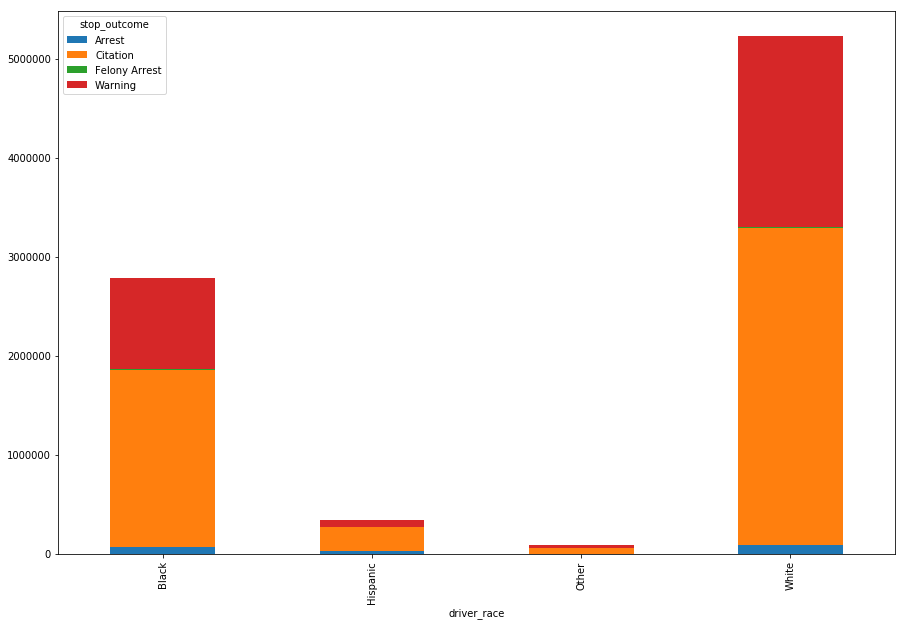

In [6]:
race_table.plot(kind="bar", stacked=True, figsize=(15, 10))

In [15]:
data["officer_race"].value_counts()

White         7432168
Black          827462
Hispanic        96725
Amerindian      40382
Asian           22747
Multi-Race      12359
Other            4785
Name: officer_race, dtype: int64